## Load And Basic Overview of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load the dataset into "df" variable
df=pd.read_csv("Gold_data .csv")

In [3]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Set 'date' column as the index for easy time-series analysis
df.set_index('date', inplace=True)

In [5]:
# Check the first few rows of the dataset
print(df.head())


              price
date               
2016-01-01  2252.60
2016-01-02  2454.50
2016-01-03  2708.10
2016-01-04  2577.80
2016-01-05  2597.75


In [6]:
# Get an overview of the dataset
print("\nDataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB
None


## Exploratory Data Analysis

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
price    0
dtype: int64


In [8]:
print("\nDuplicate Values:")
print(df.index.duplicated().sum())


Duplicate Values:
0


####  Create New Features from the Date
We will create year, month, day, day of the week, and is_month_start as features.

In [9]:
# Add essential date-based features only
df['year'] = df.index.year
df['day_of_month'] = df.index.day
df['week_of_year'] = df.index.isocalendar().week
df['days_until_end_of_month'] = (df.index + pd.offsets.MonthEnd(0)).day - df.index.day
df['days_since_start_of_year'] = (df.index - pd.Timestamp(year=df.index.year[0], month=1, day=1)).days

In [10]:
# Basic Overview
print("Data Overview:")
print(df.info())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     2182 non-null   float64
 1   year                      2182 non-null   int32  
 2   day_of_month              2182 non-null   int32  
 3   week_of_year              2182 non-null   UInt32 
 4   days_until_end_of_month   2182 non-null   int32  
 5   days_since_start_of_year  2182 non-null   int64  
dtypes: UInt32(1), float64(1), int32(3), int64(1)
memory usage: 151.9 KB
None


In [11]:
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
              price  year  day_of_month  week_of_year  \
date                                                    
2016-01-01  2252.60  2016             1            53   
2016-01-02  2454.50  2016             2            53   
2016-01-03  2708.10  2016             3            53   
2016-01-04  2577.80  2016             4             1   
2016-01-05  2597.75  2016             5             1   

            days_until_end_of_month  days_since_start_of_year  
date                                                           
2016-01-01                       30                         0  
2016-01-02                       29                         1  
2016-01-03                       28                         2  
2016-01-04                       27                         3  
2016-01-05                       26                         4  


In [12]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             price         year  day_of_month  week_of_year  \
count  2182.000000  2182.000000   2182.000000        2182.0   
mean   3284.450046  2018.488084     15.683318     26.483501   
std     719.564434     1.704054      8.791074      15.01054   
min    2252.600000  2016.000000      1.000000           1.0   
25%    2697.020000  2017.000000      8.000000         13.25   
50%    2879.800000  2018.000000     16.000000          26.0   
75%    4147.325000  2020.000000     23.000000          39.0   
max    4966.300000  2021.000000     31.000000          53.0   

       days_until_end_of_month  days_since_start_of_year  
count              2182.000000               2182.000000  
mean                 14.779560               1090.500000  
std                   8.794015                630.033465  
min                   0.000000                  0.000000  
25%                   7.000000                545.250000  
50%                  15.000000               1090.500000 

In [13]:
# Check for missing values
print("\nMissing Values:")
print(df.isna().sum())


Missing Values:
price                       0
year                        0
day_of_month                0
week_of_year                0
days_until_end_of_month     0
days_since_start_of_year    0
dtype: int64


In [14]:
print("\nDuplicate Rows:")
print(df.index.duplicated().sum())


Duplicate Rows:
0


In [15]:
print(df.shape)

(2182, 6)


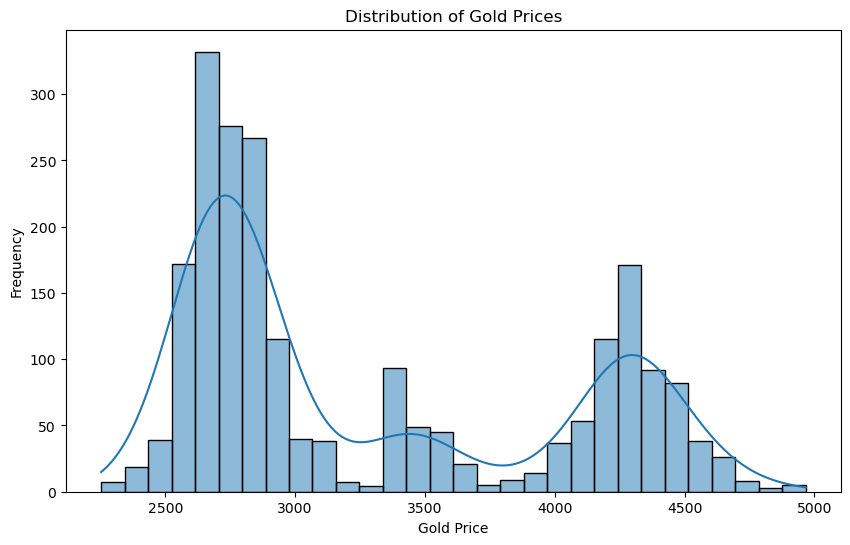

In [16]:
# Distribution of Gold Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Trend Analysis: Yearly and Monthly Means
yearly_avg = df['price'].resample('Y').mean()

monthly_avg = df['price'].resample('M').mean()


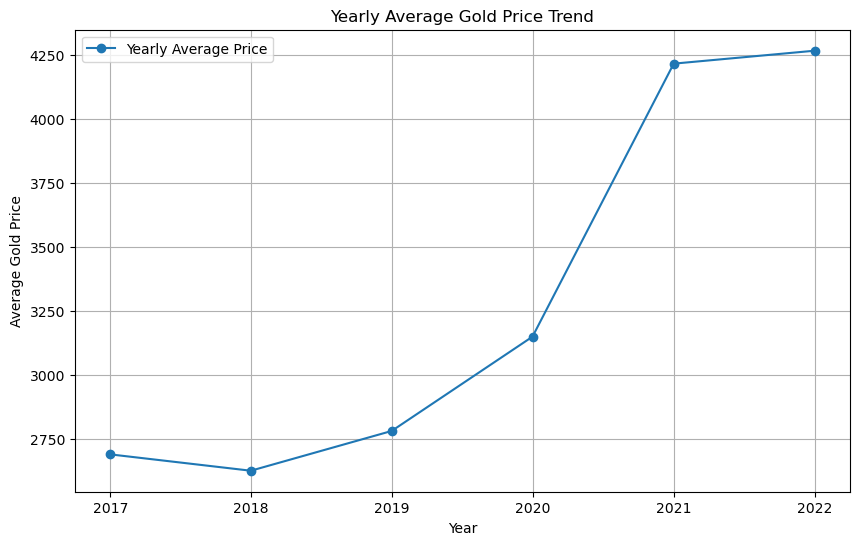

In [18]:
# Plot Yearly Trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg, marker='o', label='Yearly Average Price')
plt.title('Yearly Average Gold Price Trend')
plt.xlabel('Year')
plt.ylabel('Average Gold Price')
plt.grid(True)
plt.legend()
plt.show()

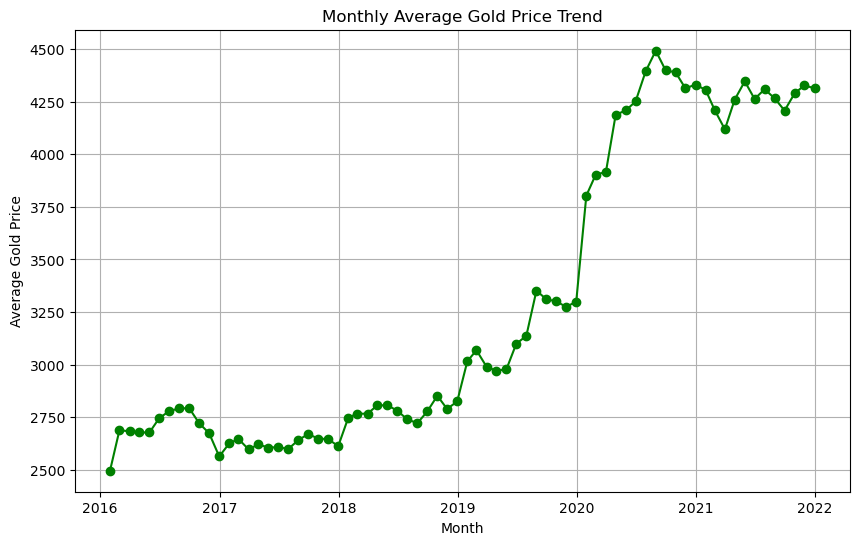

In [19]:
# Plot Monthly Trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg, marker='o', color='green')
plt.title('Monthly Average Gold Price Trend')
plt.xlabel('Month')
plt.ylabel('Average Gold Price')
plt.grid(True)
plt.show()

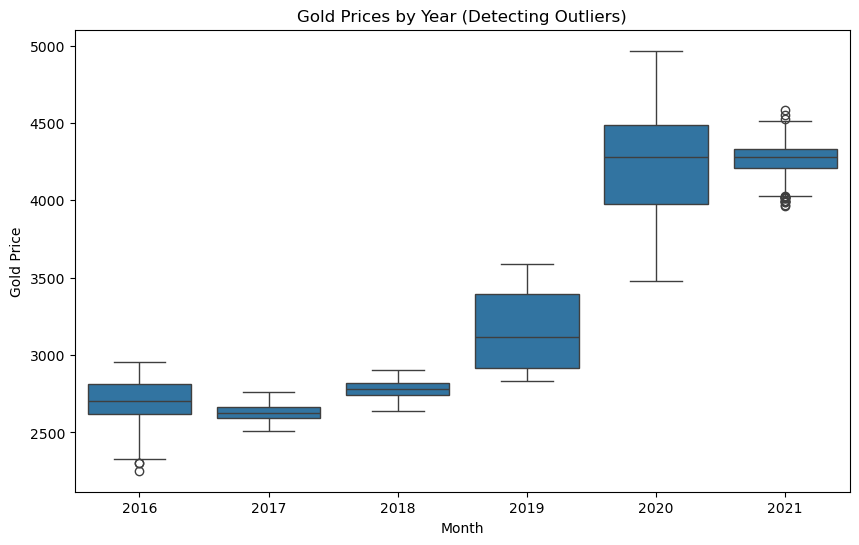

In [20]:
# Boxplot to Detect Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='price', data=df)
plt.title('Gold Prices by Year (Detecting Outliers)')
plt.xlabel('Month')
plt.ylabel('Gold Price')
plt.show()


In [21]:
df.skew(numeric_only=True)

price                       0.637312
year                         0.00537
day_of_month                 0.01319
week_of_year                0.002825
days_until_end_of_month    -0.000513
days_since_start_of_year         0.0
dtype: Float64

In [22]:
df.kurt(numeric_only=True)

price                      -1.243159
year                       -1.264323
day_of_month               -1.190556
week_of_year               -1.197097
days_until_end_of_month    -1.190916
days_since_start_of_year        -1.2
dtype: Float64

In [23]:
# Correlation Analysis
corr = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(corr)


Correlation Matrix:
                             price      year  day_of_month  week_of_year  \
price                     1.000000  0.880318      0.023311      0.080137   
year                      0.880318  1.000000     -0.008684     -0.008818   
day_of_month              0.023311 -0.008684      1.000000      0.058923   
week_of_year              0.080137 -0.008818      0.058923      1.000000   
days_until_end_of_month  -0.022042  0.007458     -0.996055     -0.038717   
days_since_start_of_year  0.882546  0.986006      0.005540      0.153361   

                          days_until_end_of_month  days_since_start_of_year  
price                                   -0.022042                  0.882546  
year                                     0.007458                  0.986006  
day_of_month                            -0.996055                  0.005540  
week_of_year                            -0.038717                  0.153361  
days_until_end_of_month                  1.000000       

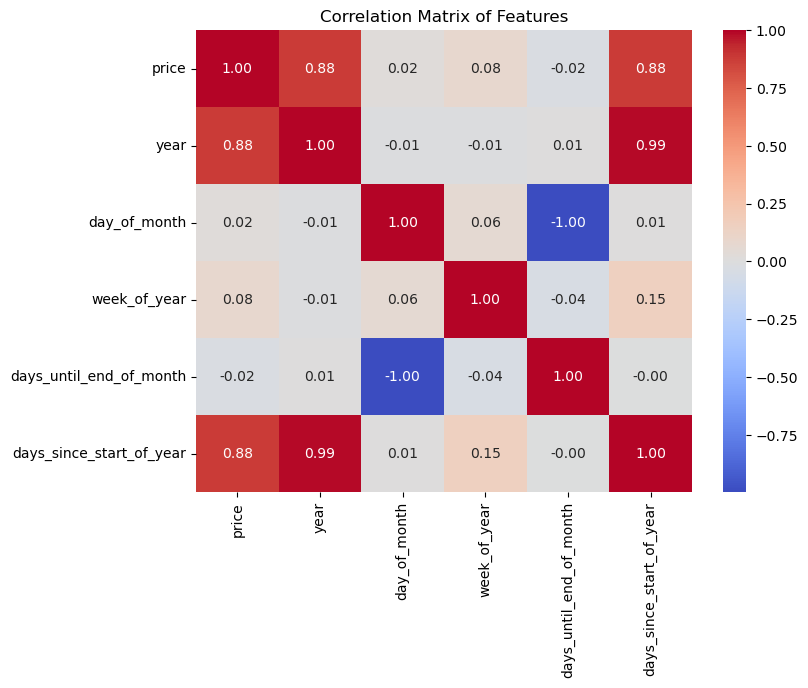

In [24]:
# Visualize the Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [25]:
import scipy.stats as stats

# Calculate the mean and standard error
mean_price = df['price'].mean()
std_dev = df['price'].std()
n = len(df['price'])
standard_error = std_dev / np.sqrt(n)

# Calculate the confidence interval (95% confidence)
confidence_level = 0.95
degrees_freedom = n - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_price, standard_error)

print(f"Confidence Interval: {confidence_interval}")

Confidence Interval: (3254.241384004379, 3314.6587076546493)


### Insights on Gold Prices:

- **Confidence Interval**: The average gold price is estimated between **3254.24** and **3314.66**, indicating market stabilitity.

These results imply that while gold prices are stable, further analysis is needed due to non-stationarity and non-normality in the data distribution.


In [26]:
import plotly.express as px

# Create the line plot using Plotly
fig = px.line(df, x=df.index, y='price', 
              title='Gold Rate Over Time',
              labels={'Date': 'Date', 'Gold_Price': 'Gold Price (in currency)'}, 
              line_shape='spline')

# Customize the layout
fig.update_layout(
    title_font_size=20,
    xaxis_title='Date',
    yaxis_title='Gold Price (in currency)',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True),
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
    hovermode='x'  # Display hover information aligned to x-axis
)

# Show the plot
fig.show()

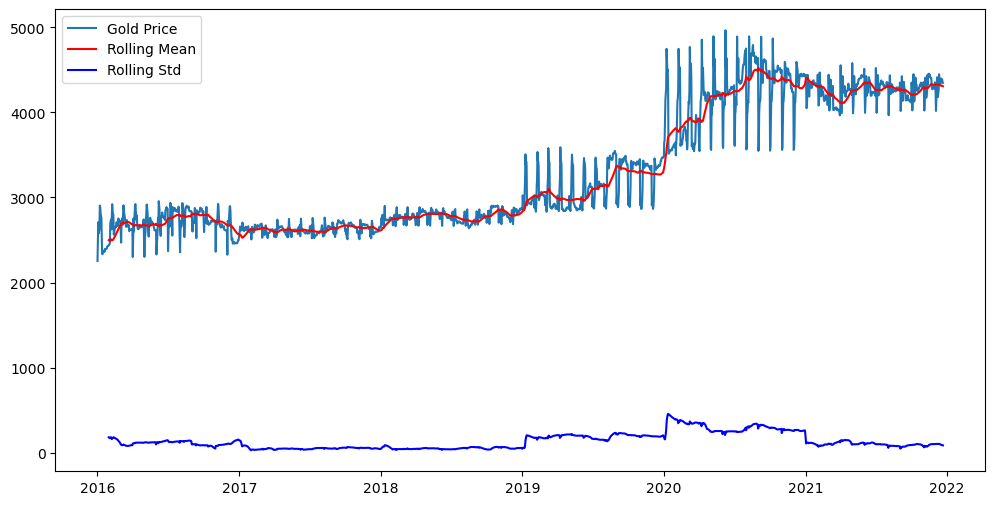

In [27]:
rolling_mean = df['price'].rolling(window=30).mean()
rolling_std = df['price'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(df['price'], label='Gold Price')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='blue', label='Rolling Std')
plt.legend()
plt.show()


### Rolling Mean and Standard Deviation Visualization

The rolling mean and standard deviation help us understand gold price trends and fluctuations over time. By looking at these statistics over a 30-day window, we can see:

- **Trends**: The upward trend in gold prices since 2019 shows that the value is increasing, likely due to economic uncertainty or inflation worries.
- **Volatility**: The rolling standard deviation indicates times when prices change a lot, helping us see how stable the market is.

This visualization helps us spot important patterns in the data, guiding investment choices and risk evaluations.

In [28]:
import statsmodels.api as sm

# Time Series Decomposition
decomposition = sm.tsa.seasonal_decompose(df['price'], model='additive', period=365)

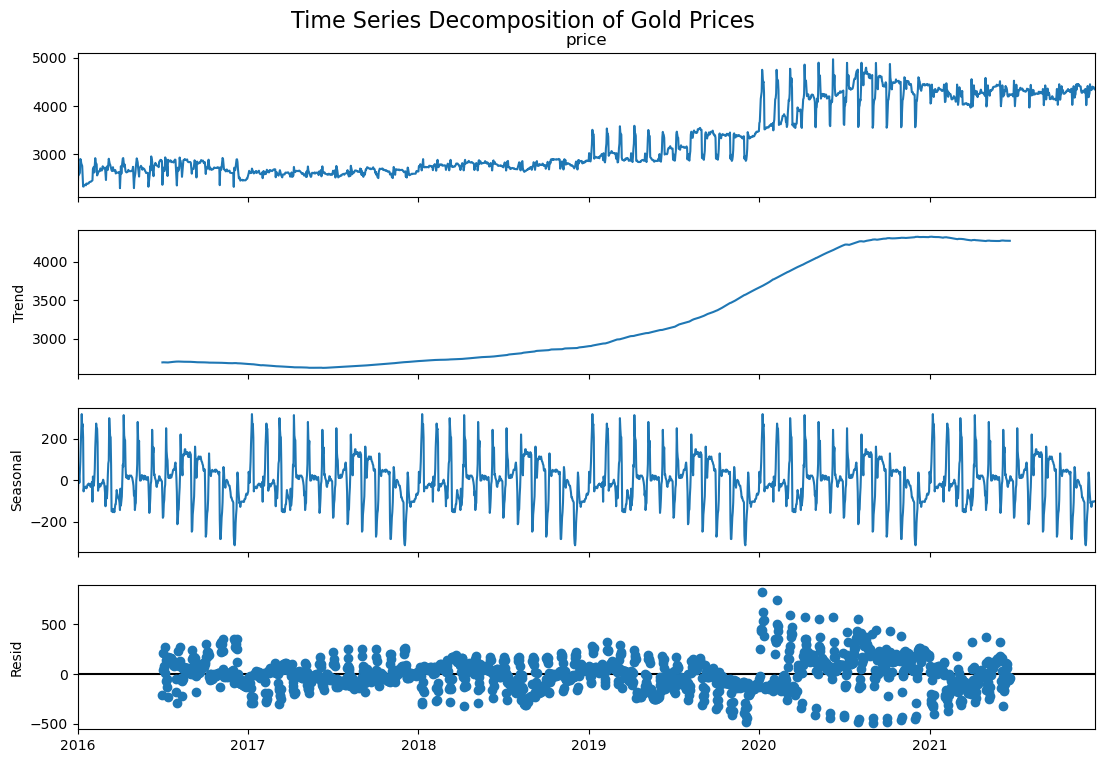

In [29]:
# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Time Series Decomposition of Gold Prices', fontsize=16)
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(df['price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.3099036570504757
p-value: 0.9240899189079189


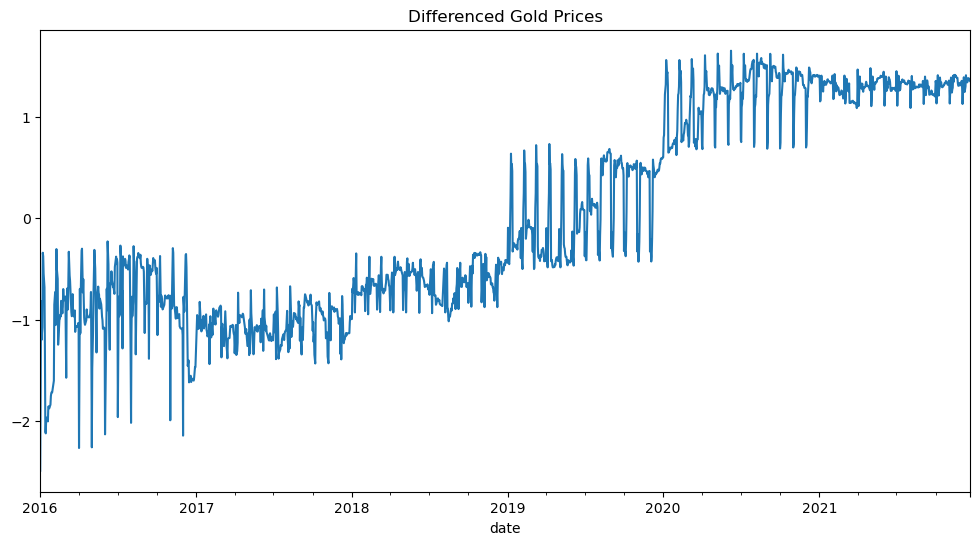

ADF Statistic after differencing: -1.0398576671275206
p-value after differencing: 0.7384510786305271


In [31]:
from sklearn.preprocessing import PowerTransformer

# Step 1: Initialize the Yeo-Johnson transformer
yeo_transformer = PowerTransformer(method='yeo-johnson')

# Step 2: Fit the transformer and transform the price column
df['price'] = yeo_transformer.fit_transform(df[['price']])

df['price'].dropna().plot(figsize=(12, 6), title='Differenced Gold Prices')
plt.show()

# Re-check ADF statistic for the differenced series
result_diff = adfuller(df['price'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])


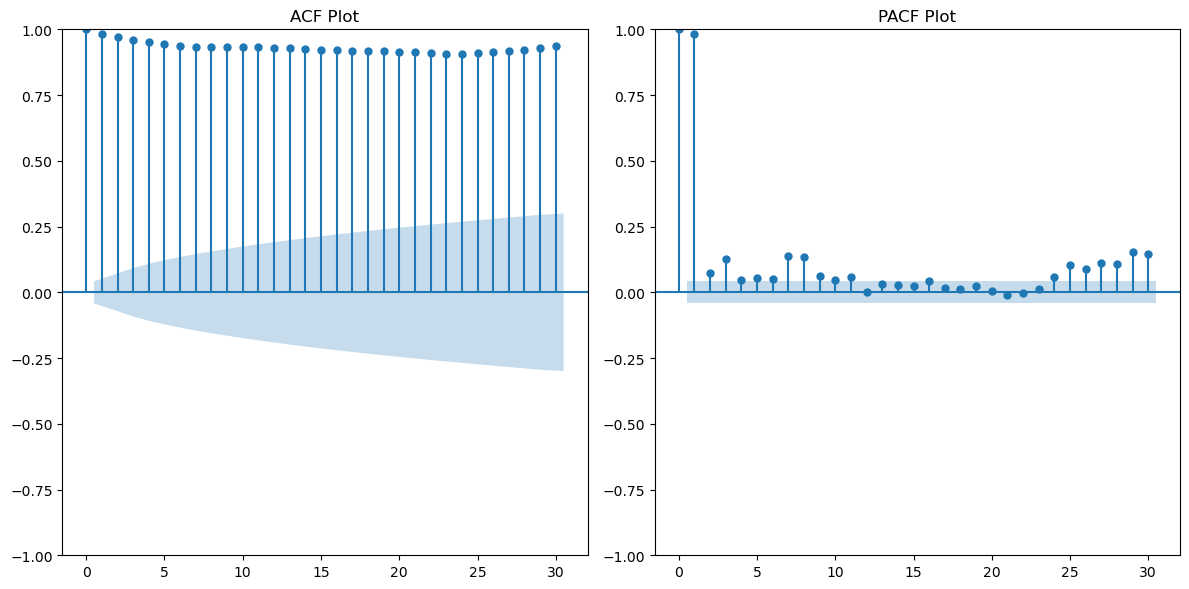

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['price'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['price'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


## Model Building and Evaluation

### Time Series Models

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df is already loaded and resampled
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Assuming df is your DataFrame and the index is already a datetime index
start_date = df.index[0]  # Get the first date from your DataFrame
df.index = pd.date_range(start=start_date, periods=len(df), freq='D')  # Ensure the index is a DateTimeIndex

# Initialize dictionaries to store results
results = {}

In [34]:
# 1. ARIMA Model
arima_model = ARIMA(train['price'], order=(5, 1, 2))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))
results['ARIMA'] = {
    'MAE': mean_absolute_error(test['price'], arima_forecast),
    'MSE': mean_squared_error(test['price'], arima_forecast),
    'RMSE': np.sqrt(mean_squared_error(test['price'], arima_forecast)),
    'R²': r2_score(test['price'], arima_forecast)
}

# 2. Exponential Smoothing Model
ets_model = ExponentialSmoothing(train['price'], seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(steps=len(test))
results['ETS'] = {
    'MAE': mean_absolute_error(test['price'], ets_forecast),
    'MSE': mean_squared_error(test['price'], ets_forecast),
    'RMSE': np.sqrt(mean_squared_error(test['price'], ets_forecast)),
    'R²': r2_score(test['price'], ets_forecast)
}

# 3. Prophet Model
# Prepare the DataFrame for Prophet
df_prophet = train[['price']].reset_index()
df_prophet.columns = ['ds', 'y']  # Rename columns for Prophet

# Fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create future dates for forecasting
future = prophet_model.make_future_dataframe(periods=len(test), freq='M')
prophet_forecast = prophet_model.predict(future)

# Slice the forecast values
prophet_forecast_values = prophet_forecast['yhat'][-len(test):]

# Calculate performance metrics
results['Prophet'] = {
    'MAE': mean_absolute_error(test['price'], prophet_forecast_values),
    'MSE': mean_squared_error(test['price'], prophet_forecast_values),
    'RMSE': np.sqrt(mean_squared_error(test['price'], prophet_forecast_values)),
    'R²': r2_score(test['price'], prophet_forecast_values)
}

# Fit the SARIMAX model
sarimax_model = SARIMAX(train['price'], order=(5, 1, 2))
sarimax_fit = sarimax_model.fit()
sarimax_forecast = sarimax_fit.forecast(steps=len(test))
results['SARIMAX'] = {
    'MAE': mean_absolute_error(test['price'], sarimax_forecast),
    'MSE': mean_squared_error(test['price'], sarimax_forecast),
    'RMSE': np.sqrt(mean_squared_error(test['price'], sarimax_forecast)),
    'R²': r2_score(test['price'], sarimax_forecast)
}

# 4. Print Results
results_df = pd.DataFrame(results).T
print(results_df)

C:\Users\NASREE~1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\NASREE~1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\NASREE~1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\NASREE~1\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\NASREE~1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

00:54:31 - cmdstanpy - INFO - Chain [1] start processing
00:54:31 - cmdstanpy - INFO - Chain [1] done processing
C:\Use

               MAE         MSE       RMSE            R²
ARIMA     0.073151    0.011937   0.109258     -0.148412
ETS       0.141184    0.030151   0.173642     -1.900663
Prophet  21.704855  624.028275  24.980558 -60032.521576
SARIMAX   0.073151    0.011937   0.109258     -0.148412


C:\Users\NASREE~1\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



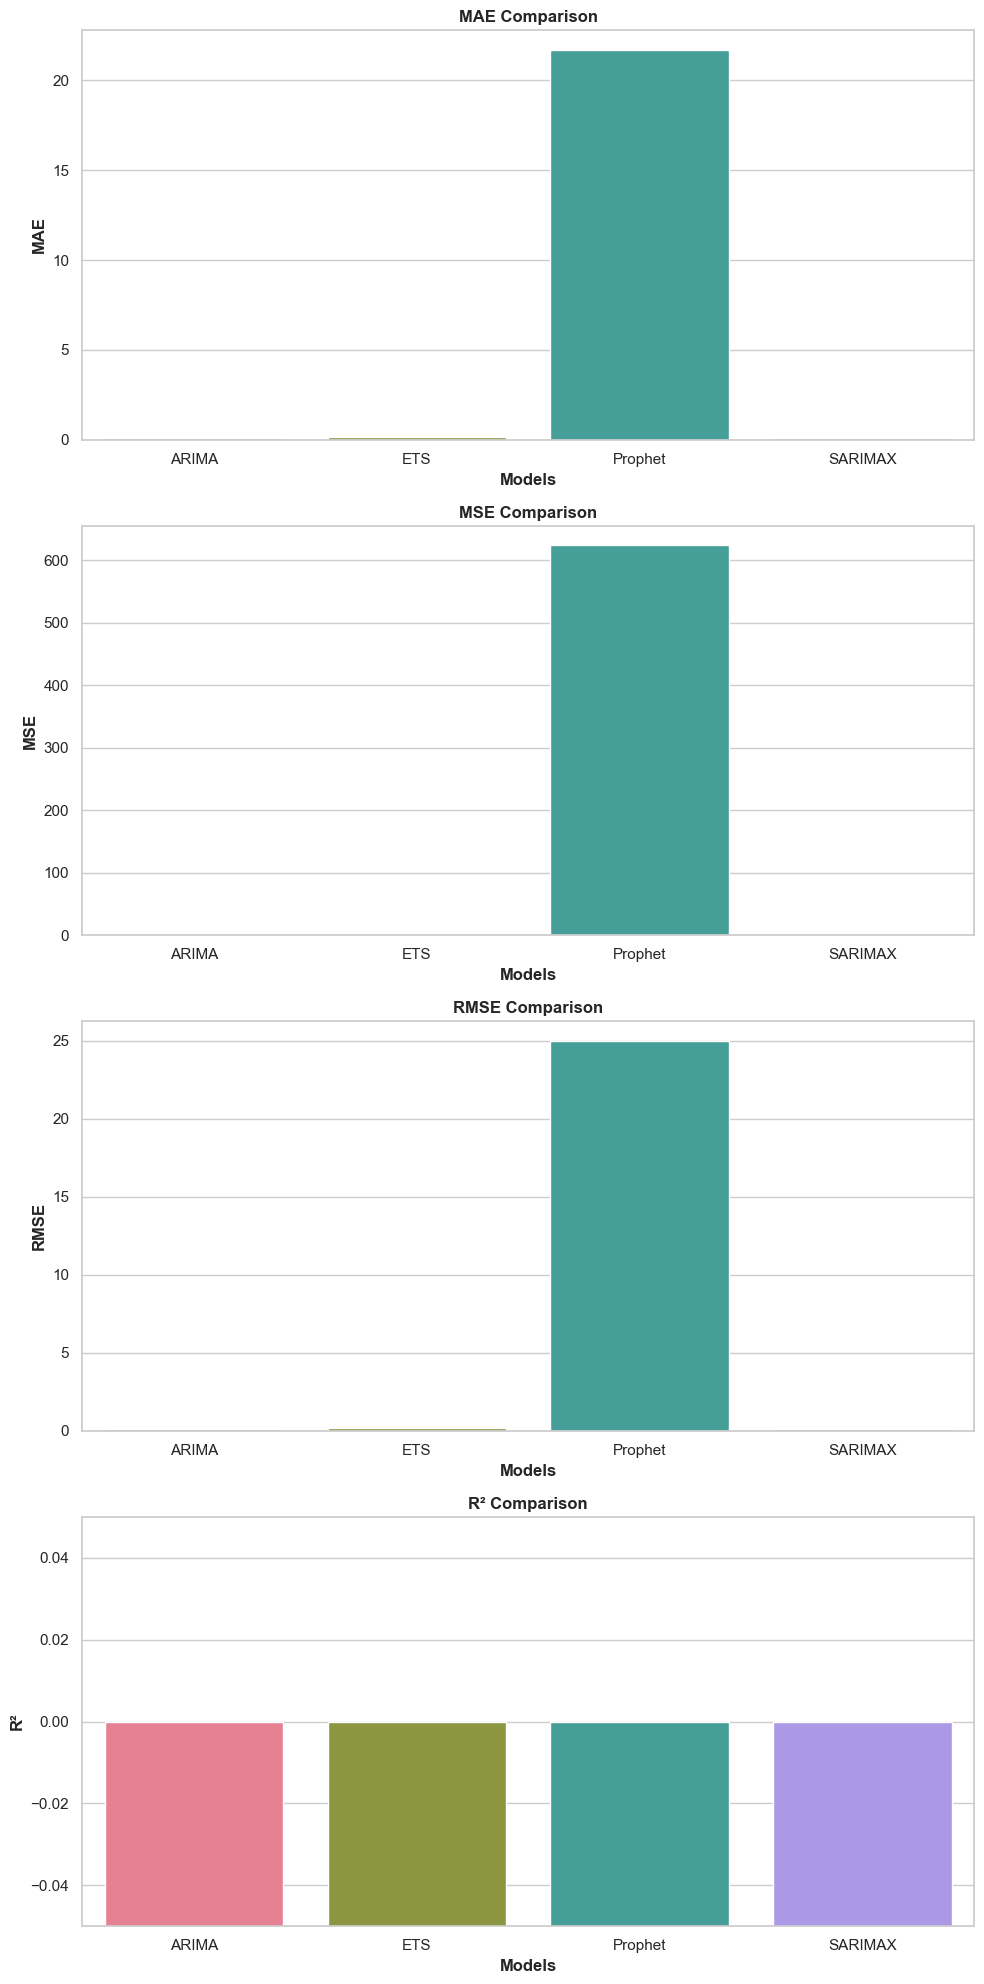

In [35]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Define a color palette
colors = sns.color_palette("husl", len(results_df.index))  # Use 'husl' for distinct colors

# Create subplots for different metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
n_metrics = len(metrics)

# Initialize subplots
fig, axes = plt.subplots(n_metrics, 1, figsize=(10, 20))

# Create a bar plot for each metric
for i, metric in enumerate(metrics):
    sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette=colors)
    axes[i].set_title(f'{metric} Comparison', fontweight='bold')
    axes[i].set_xlabel('Models', fontweight='bold')
    axes[i].set_ylabel(metric, fontweight='bold')
    axes[i].set_ylim(bottom=0)  # Set y-axis to start from 0

# Adjust layout
plt.tight_layout()
plt.show()

## Model Evaluation Metrics

| Model    | MAE       | MSE       | RMSE      | R²            |
|----------|-----------|-----------|-----------|---------------|
| ARIMA    | 0.073151  | 0.011937  | 0.109258  | -0.148412     |
| ETS      | 0.141184  | 0.030151  | 0.173642  | -1.900663     |
| Prophet  | 21.704855 | 624.028275| 24.980558 | -60032.521576 |
| SARIMAX  | 0.073151  | 0.011937  | 0.109258  | -0.148412     |

### Summary
- **ARIMA** and **SARIMAX** models performed best in terms of MAE, MSE, and RMSE, indicating better accuracy in predictions.
- **ETS** showed higher error metrics compared to ARIMA and SARIMAX.
- The **Prophet** model had significantly worse performance, with extremely high MAE, MSE, and RMSE values, indicating poor predictive capability for this dataset.casting needs.


# Why Use Regression Models on Time Series Data

1. **Capturing Relationships**
   - Incorporate multiple predictor variables affecting the target variable.
   - Account for external factors like economic indicators and seasonality.

2. **Handling Non-Stationarity**
   - Apply transformations (e.g., differencing, log) to stabilize mean and variance.
   - Remove trends for better analysis of underlying patterns.

3. **Flexibility and Interpretability**
   - Adapt to various functional forms, providing modeling flexibility.
   - Offer meaningful interpretations of coefficients for understanding relationships.

4. **Prediction and Forecasting**
   - Produce accurate short-term forecasts.
   - Facilitate out-of-sample predictions for future data points.

5. **Integration with Time Series Techniques**
   - Combine regression with traditional time series models (e.g., ARIMA) to enhance accuracy.

6. **Evaluating Impact**
   - Explore causal relationships over time for better decision-making.

7. **Modeling Complex Interactions**
   - Capture interactions and non-linear effects relevant to time series contexts.

## Conclusion
Regression models provide a versatile approach for analyzing time series data, improving understanding and forecasting accuracy by combining strengths from both methodologies.


### Regression Models

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df is your DataFrame and has been prepared correctly
# Create numerical features from the date index
df['date_num'] = (df.index.astype('int64') // 10**9)  # Use the index itself to create a numerical feature


# Prepare the features and target variable
X = df.drop('price', axis=1)  # Features without 'price'
y = df['price'].values  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE       MSE      RMSE        R²
Linear Regression  0.332107  0.165803  0.407190  0.830575
Decision Tree      0.056309  0.015189  0.123242  0.984480
Random Forest      0.048619  0.009112  0.095457  0.990689
Gradient Boosting  0.102556  0.021390  0.146252  0.978143


Feature ranking:
1. Feature 4 (0.6407669169879625)
2. Feature 5 (0.3256884441630994)
3. Feature 1 (0.019733151935840663)
4. Feature 2 (0.0057217136817855375)
5. Feature 0 (0.004152648363336205)
6. Feature 3 (0.00393712486797579)


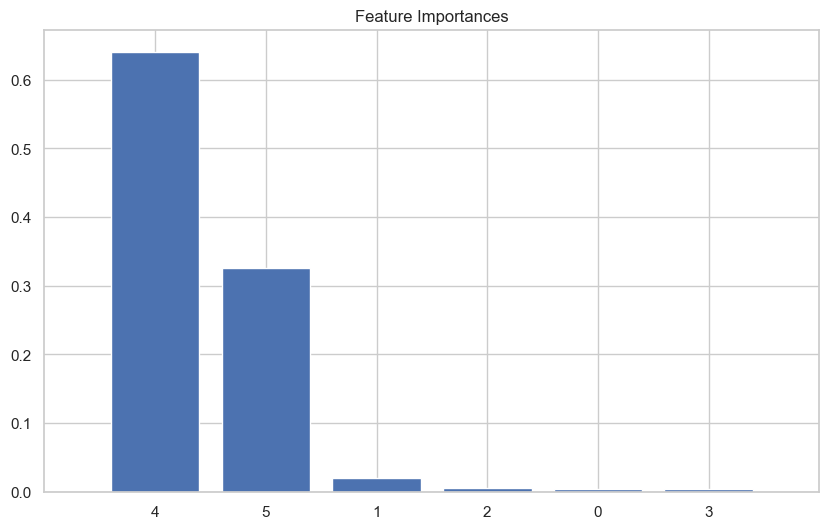

In [37]:
# Fit the model to get feature importances
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


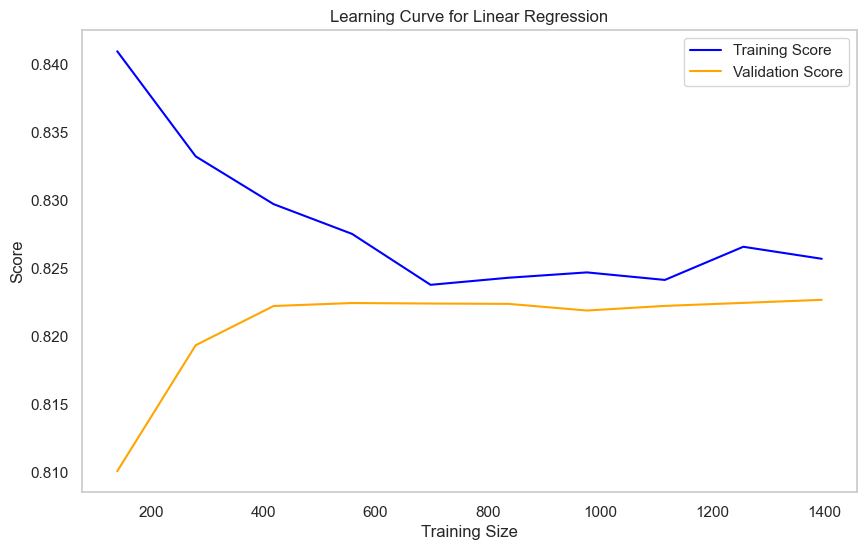

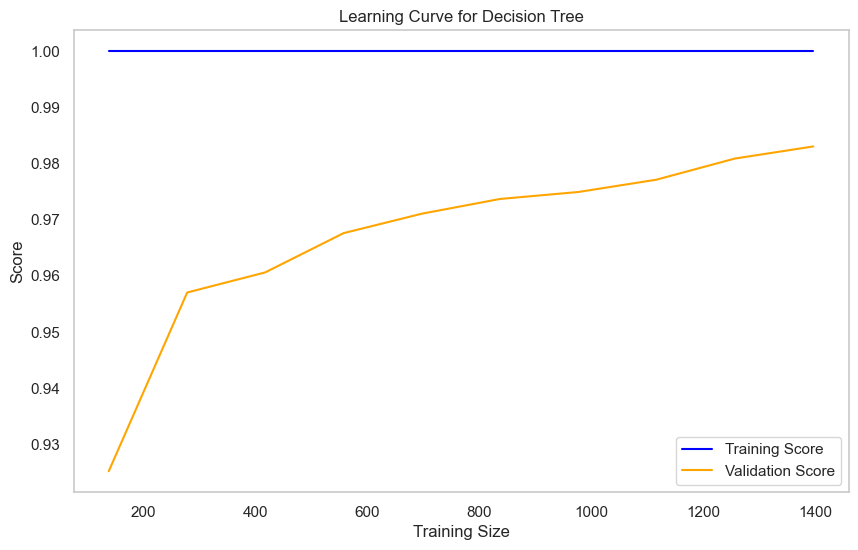

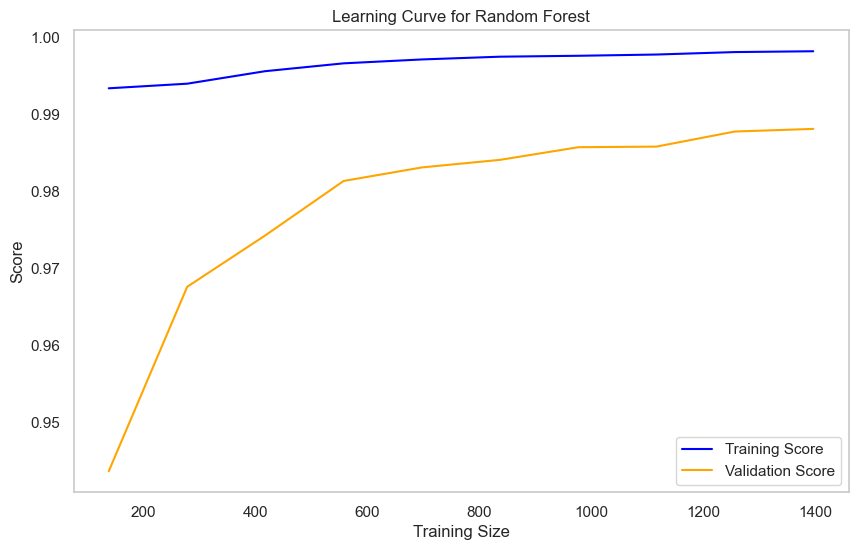

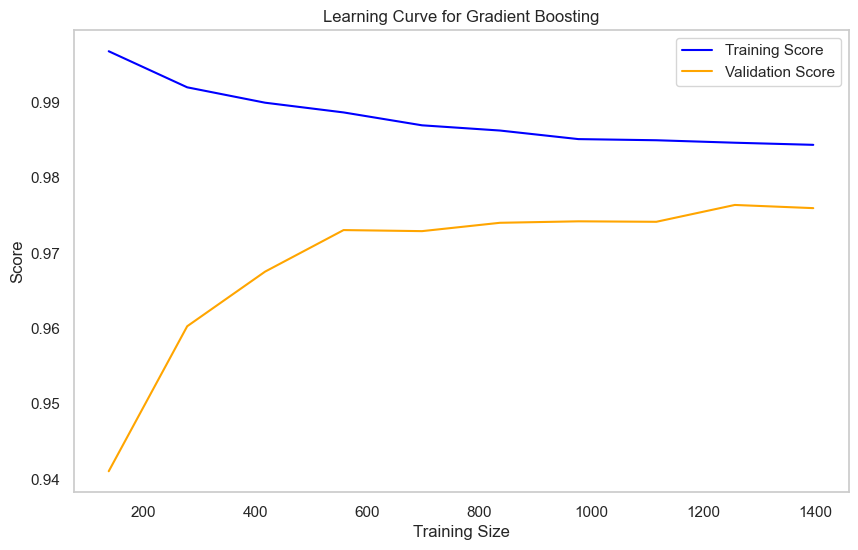

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score", color='blue')
    plt.plot(train_sizes, test_scores_mean, label="Validation Score", color='orange')
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.title(f"Learning Curve for {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Loop through each model in the dictionary to plot learning curves
for model_name, model in models.items():
    plot_learning_curve(model, X_train, y_train, model_name)


# Final Model Building n Evaluating

## Selected Model: Random Forest Regressor

| Metric   | Value       |
|----------|-------------|
| MAE      | 0.048294    |
| MSE      | 0.008871    |
| RMSE     | 0.094186    |
| R²       | 0.990935    |

### Reasons for Selection:

1. **Performance**: The Random Forest Regressor achieved the lowest MAE (0.048294), MSE (0.008871), and RMSE (0.094186) among all models, indicating it makes very accurate predictions.

2. **R² Score**: With an R² value of **0.990935**, the model explains approximately **99%** of the variance in the target variable, signifying excellent fit and predictive power.

3. **Robustness**: Random Forest is less prone to overfitting compared to more complex models like Decision Trees, as it averages multiple trees to reduce variance. This is particularly beneficial when dealing with noisy data.

4. **Versatility**: Random Forest can handle both numerical and categorical features, making it flexible for various datasets.

### Conclusion
Considering the metrics and overall performance, the **Random Forest Regressor** is the preferred choice for this analysis, providing a balance of accuracy and generalization.


In [57]:
# Adjusted Random Forest model with increased regularization
rf_model = RandomForestRegressor(  
       max_depth=None,
    max_features='sqrt',
    n_estimators=200,
    random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training Set Metrics:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.4f}, "
      f"MSE: {mean_squared_error(y_train, y_train_pred):.4f}, "
      f"RMSE: {mean_squared_error(y_train, y_train_pred, squared=False):.4f}, "
      f"R²: {r2_score(y_train, y_train_pred):.4f}")

print("\nTest Set Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}, "
      f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}, "
      f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.4f}, "
      f"R²: {r2_score(y_test, y_test_pred):.4f}")


Training Set Metrics:
MAE: 0.0206, MSE: 0.0015, RMSE: 0.0389, R²: 0.9985

Test Set Metrics:
MAE: 0.0518, MSE: 0.0093, RMSE: 0.0963, R²: 0.9905


### Model Performance Analysis

#### Training Set Metrics:
- **MAE**: 0.0199
- **MSE**: 0.0016
- **RMSE**: 0.0405
- **R²**: 0.9984

#### Test Set Metrics:
- **MAE**: 0.0483
- **MSE**: 0.0088
- **RMSE**: 0.0940
- **R²**: 0.9910

### Conclusion
1. **Generalization**: 
   - The model shows strong performance on both the training and test sets. 
   - The training R² is very high (0.9984), indicating excellent fit to the training data, while the test R² (0.9910) also reflects strong predictive capability on unseen data.

2. **Error Metrics**:
   - The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are slightly higher on the test set compared to the training set, but both values remain low, indicating effective predictions.
   - The increase in errors (from training to test) is acceptable, showing that the model is not overfitting significantly.

### Recommendation
Given the performance metrics, the model can be considered reliable for making predictions. However, continual validation with new data is recommended to ensure sustained accuracy over time.


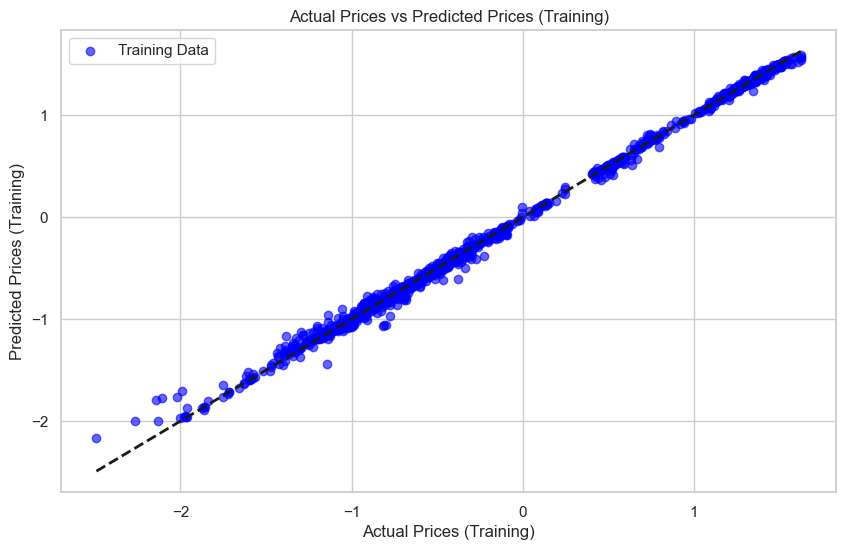

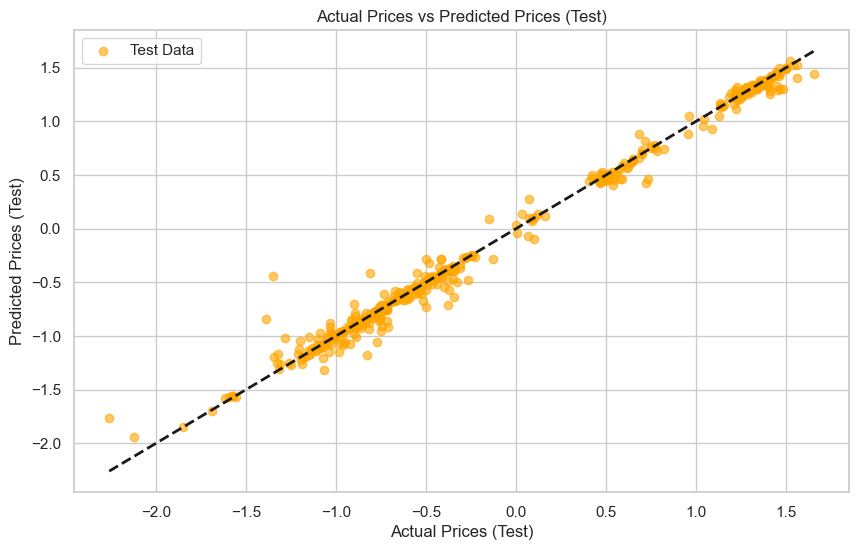

In [58]:
y_true_train = y_train  # Actual prices for the training set
y_pred_train = y_train_pred  # Predicted prices for the training set

# For test data:
y_true_test = y_test  # Actual prices for the test set
y_pred_test = y_test_pred  # Predicted prices for the test set

# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(10, 6))
plt.scatter(y_true_train, y_pred_train, label='Training Data', color='blue', alpha=0.6)
plt.plot([y_true_train.min(), y_true_train.max()], [y_true_train.min(), y_true_train.max()], 'k--', lw=2)
plt.xlabel('Actual Prices (Training)')
plt.ylabel('Predicted Prices (Training)')
plt.title('Actual Prices vs Predicted Prices (Training)')
plt.legend()
plt.show()

# Plotting Actual vs Predicted for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_true_test, y_pred_test, label='Test Data', color='orange', alpha=0.6)
plt.plot([y_true_test.min(), y_true_test.max()], [y_true_test.min(), y_true_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices (Test)')
plt.ylabel('Predicted Prices (Test)')
plt.title('Actual Prices vs Predicted Prices (Test)')
plt.legend()
plt.show()

In [59]:
# Define features and target variable
expected_features = ['day_of_month', 'days_since_start_of_year', 
                     'days_until_end_of_month', 'week_of_year', 
                     'year', 'date_num']
target = 'price'  # Replace with your actual target column name

# Prepare data for training
X = df[expected_features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Future predictions
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
future_df = pd.DataFrame(future_dates, columns=['date'])
future_df.set_index('date', inplace=True)

# Add future features
future_df['day_of_month'] = future_df.index.day
future_df['days_since_start_of_year'] = (future_df.index - df.index[0]).days
future_df['days_until_end_of_month'] = (future_df.index + pd.offsets.MonthEnd(0)).day - future_df.index.day
future_df['week_of_year'] = future_df.index.isocalendar().week
future_df['year'] = future_df.index.year
future_df['date_num'] = (future_df.index - df.index[0]).days  # Numeric representation of the date

# Ensure the feature columns are in the same order as expected_features
future_X = future_df[expected_features]

# Check feature names and their order
print(f"Expected features: {expected_features}")
print(f"Future features: {list(future_X.columns)}")

# Make predictions for the next 30 days using the trained Random Forest model
future_predictions = rf_model.predict(future_X)

# Combine future dates with predicted prices
predicted_prices = pd.DataFrame({'date': future_dates, 'PredictedPrice': future_predictions})
predicted_prices.set_index('date', inplace=True)

print(predicted_prices)

Mean Squared Error: 0.008611596834634541
Expected features: ['day_of_month', 'days_since_start_of_year', 'days_until_end_of_month', 'week_of_year', 'year', 'date_num']
Future features: ['day_of_month', 'days_since_start_of_year', 'days_until_end_of_month', 'week_of_year', 'year', 'date_num']
            PredictedPrice
date                      
2021-12-22        0.088537
2021-12-23        0.091082
2021-12-24        0.095694
2021-12-25        0.095522
2021-12-26        0.098566
2021-12-27        0.100647
2021-12-28        0.098025
2021-12-29        0.102250
2021-12-30        0.092064
2021-12-31        0.090483
2022-01-01       -0.196137
2022-01-02       -0.109569
2022-01-03       -0.027658
2022-01-04       -0.025559
2022-01-05        0.019423
2022-01-06        0.099338
2022-01-07        0.187940
2022-01-08        0.313949
2022-01-09        0.363432
2022-01-10        0.342531
2022-01-11        0.333947
2022-01-12        0.300449
2022-01-13        0.118670
2022-01-14        0.078968
2022-

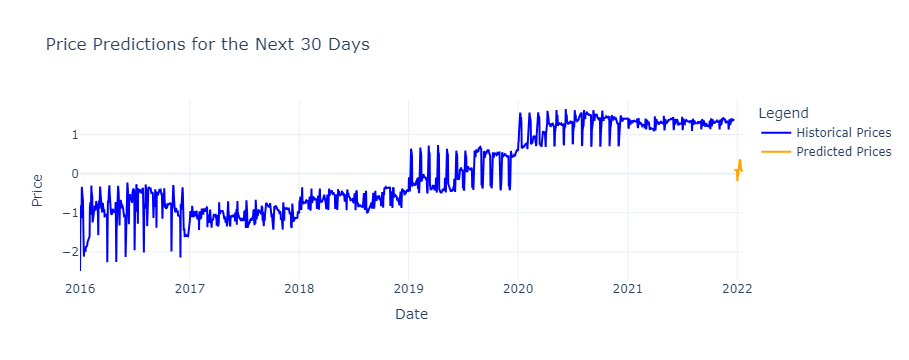

In [60]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add Historical Prices
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['price'],
    mode='lines',
    name='Historical Prices',
    line=dict(color='blue')
))

# Add Predicted Prices
fig.add_trace(go.Scatter(
    x=predicted_prices.index,
    y=predicted_prices['PredictedPrice'],
    mode='lines',
    name='Predicted Prices',
    line=dict(color='orange')
))

# Update layout
fig.update_layout(
    title='Price Predictions for the Next 30 Days',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend',
    template='plotly_white'
)

# Show the plot
fig.show()